In [225]:
from zget_data import get_responses, get_qdetails, get_questions
from collections import defaultdict
import pandas as pd
import json

In [226]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [227]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Aesthetics': [5, 7, 8, 9],
    'Usefulness': [10, 11, 12, 13],
    'Clarity': [14, 15, 16, 17],
    'Creative': [28],
    'Engaging': [6, 15, 29]
    # 'Novel': [],
    # 'Attractive': [],
    # 'Easy to understand': [],
    # 'Informative': [],
    # 'Well Organized ': [],
    # 'To the Point': []
}

In [228]:
password_response, time_response, survey_response, dids = get_responses()

In [229]:
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password2,password2_recall1,password2_recall2,password2_recall3
0,6IctttoCM^,NaN,NaN,NaN
1,1trdiayw$&,1trdiayw&$,1trdiayw&$,NaN
2,Chevy68#,NaN,NaN,NaN
3,igahot6844$,NaN,NaN,NaN
4,Password123!,NaN,NaN,NaN
5,ihtgoojd24,NaN,NaN,NaN
6,Bwmfd1!,NaN,NaN,NaN
7,IWTCDTE!,NaN,NaN,NaN
8,MD!wtsf,NaN,NaN,NaN
9,6754$#,NaN,NaN,NaN


In [230]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,10.255,32.479,18.423,107.595,84.749,322.202,17.036,101.708,27.493,65.827,68.461,60.278,15.275100
2,3.005,14.405,8.269,28.876,71.381,263.868,5.077,94.804,15.165,45.252,13.180,50.644,10.232100
3,47.552,27.253,9.852,122.930,47.599,223.082,24.884,69.051,16.381,40.184,21.445,95.529,12.429033
4,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283
5,5.453,28.630,15.469,29.669,147.708,243.538,12.105,96.265,8.017,70.176,15.129,48.560,12.011983
6,390.267,33.952,8.106,44.250,45.859,108.347,13.635,41.843,12.956,54.012,12.891,47.699,13.563617
7,5.027,10.247,9.382,129.634,38.683,218.244,10.890,51.043,13.859,28.621,9.081,34.495,9.320100
8,4.906,17.022,13.134,105.295,60.117,183.871,13.250,34.445,28.712,33.622,18.875,37.998,9.187450
9,5.307,6.465,8.567,4.670,35.472,165.960,10.517,22.076,14.942,39.105,10.935,20.554,5.742833


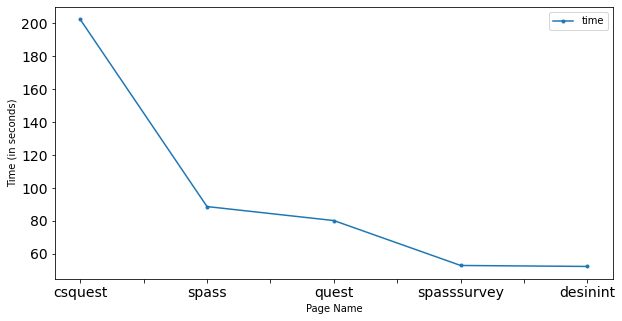

In [231]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [232]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,8,12,3,7,14
0,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '4', '1-4': '3'}","{'1-13': '2', '1-17': '7', '1-15': '7', '1-14'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-..."
1,"{'6-1': '1', '7-1': '6', '7-2': '7', '7-3': '7...","{'1-1': '7', '2-1': '7', '3-1': '3', '3-2': '2...","{'1-1': '6', '1-2': '6', '1-3': '7', '1-4': '1'}","{'1-13': '2', '1-12': '1', '1-16': '2', '1-17'...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'..."
2,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '1', '3-2': '1...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-15': '6', '1-13': '2', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-..."
3,"{'6-1': '1', '7-1': '5', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '4', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '5', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-12': '2', '1-14'...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'..."
4,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '5...","{'1-1': '5', '2-1': '4', '3-1': '1', '3-2': '1...","{'1-1': '7', '1-2': '5', '1-3': '6', '1-4': '4'}","{'1-17': '4', '1-13': '6', '1-16': '5', '1-12'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'..."
5,"{'1-3': '5', '1-8': '5', '1-7': '5', '1-6': '5...","{'1-1': '5', '2-1': '3', '3-1': '2', '3-2': '1...","{'1-1': '5', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-11': '5', '1-13': '3', '1-15': '5', '1-12'...","{'1-1': 'Man', '2-1': 'Above 65 years old', '3..."
6,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '7...","{'1-1': '6', '2-1': '7', '3-1': '3', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '6', '1-4': '2'}","{'1-12': '3', '1-15': '6', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '60-64 years old', '3-..."
7,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-17': '7', '1-12'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'..."
8,"{'6-1': '1', '7-1': '4', '7-2': '5', '7-3': '6...","{'1-1': '5', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '7', '1-2': '1', '1-3': '1', '1-4': '5'}","{'1-15': '6', '1-17': '7', '1-11': '7', '1-12'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-..."
9,"{'6-1': '1', '7-1': '6', '7-2': '4', '7-3': '6...","{'1-1': '4', '2-1': '6', '3-1': '6', '3-2': '3...","{'1-1': '4', '1-2': '6', '1-3': '6', '1-4': '5'}","{'1-14': '7', '1-16': '4', '1-17': '6', '1-12'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'..."


In [233]:
survey_response_df['did'] = dids
survey_response_df.groupby(by='did').count()

,8,12,3,7,14
did,,,,,
1,14,14,14,14,14
2,12,12,12,12,12
3,13,13,13,13,13
4,6,6,6,6,6


### Attention Check

In [234]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   },
   '12': {
      '4-1': 2
   }
}

In [235]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the second option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [236]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

In [237]:
attentive = pd.DataFrame(attentive_participants, index=[0]).transpose()
attentive.columns = ['attentive']
attentive.value_counts()

attentive
True         45
dtype: int64

In [238]:
survey_response_df['attention'] = attentive['attentive'].values
survey_response_df = survey_response_df.loc[survey_response_df['attention'] == True]
survey_response_df

,8,12,3,7,14,did,attention
0,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '4', '1-4': '3'}","{'1-13': '2', '1-17': '7', '1-15': '7', '1-14'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-...",1,True
1,"{'6-1': '1', '7-1': '6', '7-2': '7', '7-3': '7...","{'1-1': '7', '2-1': '7', '3-1': '3', '3-2': '2...","{'1-1': '6', '1-2': '6', '1-3': '7', '1-4': '1'}","{'1-13': '2', '1-12': '1', '1-16': '2', '1-17'...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'...",2,True
2,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '1', '3-2': '1...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '1'}","{'1-15': '6', '1-13': '2', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '50-54 years old', '3-...",4,True
3,"{'6-1': '1', '7-1': '5', '7-2': '6', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '4', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '5', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-12': '2', '1-14'...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'...",4,True
4,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '5...","{'1-1': '5', '2-1': '4', '3-1': '1', '3-2': '1...","{'1-1': '7', '1-2': '5', '1-3': '6', '1-4': '4'}","{'1-17': '4', '1-13': '6', '1-16': '5', '1-12'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'...",2,True
5,"{'1-3': '5', '1-8': '5', '1-7': '5', '1-6': '5...","{'1-1': '5', '2-1': '3', '3-1': '2', '3-2': '1...","{'1-1': '5', '1-2': '7', '1-3': '7', '1-4': '1'}","{'1-11': '5', '1-13': '3', '1-15': '5', '1-12'...","{'1-1': 'Man', '2-1': 'Above 65 years old', '3...",3,True
6,"{'6-1': '1', '7-1': '6', '7-2': '6', '7-3': '7...","{'1-1': '6', '2-1': '7', '3-1': '3', '3-2': '2...","{'1-1': '6', '1-2': '5', '1-3': '6', '1-4': '2'}","{'1-12': '3', '1-15': '6', '1-11': '6', '1-14'...","{'1-1': 'Woman', '2-1': '60-64 years old', '3-...",3,True
7,"{'6-1': '1', '7-1': '6', '7-2': '5', '7-3': '6...","{'1-1': '6', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '2', '1-2': '6', '1-3': '6', '1-4': '2'}","{'1-11': '6', '1-16': '3', '1-17': '7', '1-12'...","{'1-1': 'Man', '2-1': '35-39 years old', '3-1'...",2,True
8,"{'6-1': '1', '7-1': '4', '7-2': '5', '7-3': '6...","{'1-1': '5', '2-1': '6', '3-1': '2', '3-2': '2...","{'1-1': '7', '1-2': '1', '1-3': '1', '1-4': '5'}","{'1-15': '6', '1-17': '7', '1-11': '7', '1-12'...","{'1-1': 'Woman', '2-1': '55-59 years old', '3-...",2,True
9,"{'6-1': '1', '7-1': '6', '7-2': '4', '7-3': '6...","{'1-1': '4', '2-1': '6', '3-1': '6', '3-2': '3...","{'1-1': '4', '1-2': '6', '1-3': '6', '1-4': '5'}","{'1-14': '7', '1-16': '4', '1-17': '6', '1-12'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...",3,True


In [239]:
survey_response_df.groupby(by='did').count()

,8,12,3,7,14,attention
did,,,,,,
1,14,14,14,14,14,14
2,12,12,12,12,12,12
3,13,13,13,13,13,13
4,6,6,6,6,6,6


In [240]:
questions = get_questions()

### First Password Survey Analysis

In [241]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [242]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
1-1,6,6,2,6,7,5,6,2,7,4,...,2,2,5,6,4,3,5,7,6,5
1-2,5,6,6,5,5,7,5,6,1,6,...,7,7,2,7,6,7,6,6,2,5
1-3,4,7,6,5,6,7,6,6,1,6,...,7,7,7,7,5,6,3,7,3,4
1-4,3,1,1,2,4,1,2,2,5,5,...,1,2,2,6,7,1,7,6,5,3


In [243]:
# fpasssurvey
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,median
"I do not change my passwords, unless I have to.",6,6,2,6,7,5,6,2,7,4,...,2,5,6,4,3,5,7,6,5,6.0
I use different passwords for different online accounts that I have.,5,6,6,5,5,7,5,6,1,6,...,7,2,7,6,7,6,6,2,5,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",4,7,6,5,6,7,6,6,1,6,...,7,7,7,5,6,3,7,3,4,6.0
I do not include special characters in my password if it’s not required.,3,1,1,2,4,1,2,2,5,5,...,2,2,6,7,1,7,6,5,3,4.0


In [244]:
get_qdetails('7', '1-1')

"\n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'not understandable', 'high': 'understandable'}}"

### Quest Analysis

In [245]:
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,mean
1-13,2,2,2,2,6,3,2,3,4,7,...,2,1,6,4,3,4,1,4,5,3.066667
1-17,7,7,7,5,4,6,6,7,7,6,...,7,4,7,3,7,4,7,6,4,5.911111
1-15,7,7,6,5,5,5,6,6,6,5,...,7,2,6,5,7,7,7,6,4,5.711111
1-14,7,6,6,6,3,5,6,6,6,7,...,7,5,6,6,6,6,7,5,4,5.866667
1-16,1,2,2,3,5,2,2,3,2,4,...,1,3,6,7,1,3,1,1,5,2.666667
1-12,1,1,2,2,6,2,3,2,2,2,...,1,1,7,3,1,6,1,2,4,2.711111
1-11,7,7,6,6,3,5,6,6,7,4,...,7,7,7,4,7,7,6,5,3,5.777778
1-6,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7.000000
1-3,5,6,7,6,3,6,3,6,7,6,...,6,1,6,4,7,7,7,5,2,5.155556
1-8,6,7,6,6,2,4,4,4,6,4,...,6,6,7,5,6,5,6,5,2,5.111111


In [246]:
# quest
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,mean
rewarding,6.0,6.0,6.0,6.0,2.0,5.0,6.0,5.0,4.0,1.0,...,6.0,7.0,2.0,4.0,5.0,4.0,7.0,4.0,3.0,4.933333
organized,7.0,7.0,7.0,5.0,4.0,6.0,6.0,7.0,7.0,6.0,...,7.0,4.0,7.0,3.0,7.0,4.0,7.0,6.0,4.0,5.911111
structured,7.0,7.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,...,7.0,2.0,6.0,5.0,7.0,7.0,7.0,6.0,4.0,5.711111
well grouped,7.0,6.0,6.0,6.0,3.0,5.0,6.0,6.0,6.0,7.0,...,7.0,5.0,6.0,6.0,6.0,6.0,7.0,5.0,4.0,5.866667
ordered,7.0,6.0,6.0,5.0,3.0,6.0,6.0,5.0,6.0,4.0,...,7.0,5.0,2.0,1.0,7.0,5.0,7.0,7.0,3.0,5.333333
beneficial,7.0,7.0,6.0,6.0,2.0,6.0,5.0,6.0,6.0,6.0,...,7.0,7.0,1.0,5.0,7.0,2.0,7.0,6.0,4.0,5.288889
helpful,7.0,7.0,6.0,6.0,3.0,5.0,6.0,6.0,7.0,4.0,...,7.0,7.0,7.0,4.0,7.0,7.0,6.0,5.0,3.0,5.777778
select rightmost circle,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.000000
easy,5.0,6.0,7.0,6.0,3.0,6.0,3.0,6.0,7.0,6.0,...,6.0,1.0,6.0,4.0,7.0,7.0,7.0,5.0,2.0,5.155556
appealing,6.0,7.0,6.0,6.0,2.0,4.0,4.0,4.0,6.0,4.0,...,6.0,6.0,7.0,5.0,6.0,5.0,6.0,5.0,2.0,5.111111


In [247]:
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
6-1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7-1,6,6,6,5,6,7,6,6,4,6,...,7,6,7,7,6,6,5,7,3,5
7-2,5,7,6,6,5,7,6,5,5,4,...,7,6,6,6,4,6,4,6,4,5
7-3,6,7,6,6,5,7,7,6,6,6,...,7,7,7,7,7,6,6,7,2,5
8-1,7,7,6,6,5,6,6,6,6,3,...,7,6,7,6,5,6,3,6,6,6
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Gaming Websites]",[Social Media],[None of the above],"[Email, Government Websites]",[Financial Websites],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Course Management Websites, e.g...","[Financial Websites, Government Websites, Cour...",...,"[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Financial Websites, Gaming Webs...","[Social Media, Gaming Websites, E-commerce Web...","[Financial Websites, Government Websites, Cour...","[Social Media, Email, E-commerce Websites, Cou...","[Gaming Websites, Course Management Websites, ...","[Social Media, Email, E-commerce Websites]","[Financial Websites, Government Websites, Cour...",[Social Media]
2-1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3-1,7,7,6,6,6,7,7,7,4,3,...,7,7,7,7,3,6,4,7,4,6
3-2,6,7,6,6,4,6,7,7,6,5,...,7,6,7,6,5,6,6,7,5,5
3-3,6,7,6,6,5,7,7,7,6,5,...,7,6,7,7,2,7,6,7,4,5


In [248]:
# csquest
qualindex = ['9-1', '11-1']

csquest = pd.DataFrame(survey_response_df['8'].to_dict())
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Gaming Websites]",[Social Media],[None of the above],"[Email, Government Websites]",[Financial Websites],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Course Management Websites, e.g...","[Financial Websites, Government Websites, Cour...",...,"[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Financial Websites, Gaming Webs...","[Social Media, Gaming Websites, E-commerce Web...","[Financial Websites, Government Websites, Cour...","[Social Media, Email, E-commerce Websites, Cou...","[Gaming Websites, Course Management Websites, ...","[Social Media, Email, E-commerce Websites]","[Financial Websites, Government Websites, Cour...",[Social Media]
11-1,"I like the idea. I like the example phrase ""I ...",This is entertaining and relatable! It is an i...,I think the design looks nice and it was well ...,I think the strategy if easy to follow but I t...,I thought about if I would personally use this...,For me it is way too many steps as I already k...,"I like it, it is simple like texting with a fr...",It is nice. Simple to read and understand. S...,I think that it is clean and concise and under...,It is good and very strong to create online ac...,...,I think it is simple yet very informative. It ...,It looks like a text message exchange between ...,It's very creative and easy to understand with...,social media presentation,It is easy to evaluate and create ideas for st...,I think it is straight forward and presents a ...,It is easy to evaluate and create some strong ...,It was simple and clean.,It's in a simple comic format that nothing rea...,Seems simple and affective. I wish the numbers...


In [249]:
normqsid = []

csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,mean,median
Stimulates me to create a strong password,6.0,6.0,6.0,5.0,6.0,7.0,6.0,6.0,4.0,6.0,...,7.0,7.0,6.0,6.0,5.0,7.0,3.0,5.0,5.511111,6.000000
Makes me put trust on the presented password creation strategy,5.0,7.0,6.0,6.0,5.0,7.0,6.0,5.0,5.0,4.0,...,6.0,6.0,4.0,6.0,4.0,6.0,4.0,5.0,5.222222,6.000000
Encourages me to use the presented password creation strategy in real life,6.0,7.0,6.0,6.0,5.0,7.0,7.0,6.0,6.0,6.0,...,7.0,7.0,7.0,6.0,6.0,7.0,2.0,5.0,5.688889,6.000000
,7.0,7.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,3.0,...,7.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,5.711111,6.000000
Encourages me to create a strong password,7.0,7.0,6.0,6.0,6.0,7.0,7.0,7.0,4.0,3.0,...,7.0,7.0,3.0,6.0,4.0,7.0,4.0,6.0,5.644444,6.000000
Makes me feel capable of creating a strong password,6.0,7.0,6.0,6.0,4.0,6.0,7.0,7.0,6.0,5.0,...,7.0,6.0,5.0,6.0,6.0,7.0,5.0,5.0,5.688889,6.000000
Makes me feel confident that I can create a strong password,6.0,7.0,6.0,6.0,5.0,7.0,7.0,7.0,6.0,5.0,...,7.0,7.0,2.0,7.0,6.0,7.0,4.0,5.0,5.755556,6.000000
,6.0,4.0,6.0,6.0,3.0,3.0,6.0,4.0,7.0,3.0,...,7.0,6.0,6.0,6.0,3.0,7.0,6.0,5.0,5.244444,6.000000
,7.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,6.0,...,0.0,7.0,4.0,7.0,5.0,7.0,0.0,5.0,3.600000,5.000000
Novel,7.0,7.0,6.0,6.0,2.0,5.0,7.0,5.0,3.0,5.0,...,6.0,7.0,5.0,5.0,5.0,7.0,3.0,4.0,5.333333,5.166667


In [250]:
#spasssurvey
pd.DataFrame(survey_response_df['12'].to_dict())

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
1-1,6,7,6,6,5,5,6,6,5,4,...,7,7,7,7,5,6,5,7,5,4
2-1,6,7,6,6,4,3,7,6,6,6,...,7,7,7,7,7,6,7,7,6,5
3-1,2,3,1,4,1,2,3,2,2,6,...,6,3,1,6,5,3,6,7,5,4
3-2,2,2,1,2,1,1,2,2,2,3,...,1,1,1,7,3,3,4,1,2,2
3-3,2,1,1,2,1,1,2,1,1,5,...,1,1,1,6,6,1,5,1,1,1
3-4,6,7,5,5,4,3,6,4,4,5,...,7,6,5,7,3,4,6,7,5,4
4-1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
5-1,6,7,5,6,2,5,6,5,7,5,...,7,6,7,7,6,5,5,7,5,5
6-1,4,7,6,6,5,5,6,6,7,4,...,7,6,1,6,4,7,7,7,3,5
7-1,2,1,1,2,3,2,6,1,2,6,...,1,5,5,7,6,3,4,1,5,3


In [251]:
# # spasssurvey
# normqsid = []
# spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
# normspass = 8 - spass.loc[normqsid]
# spass.update(normspass)
# spass

# new_index = {}
# for qsid in spass.index:
#     # likert_scale = 'low' if qsid in normqsid else 'high'
#     new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
# new_index
# spass = spass.rename(new_index)
# spass['median'] = spass.median(axis=1)
# spass

# demo
pd.DataFrame(survey_response_df['14'].to_dict())